In [1]:
import pandas as pd

train = pd.read_csv('train.csv')
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [2]:
train.shape

(8523, 12)

In [3]:
test = pd.read_csv('test.csv')
test.shape

(5681, 11)

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [5]:
train.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [6]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [7]:
for col in train.columns:
    print(f'{col} :\n')
    print(f'Unique Values: {train[col].unique()}\n')
    print(train[col].value_counts())
    print('\n\n')

Item_Identifier :

Unique Values: ['FDA15' 'DRC01' 'FDN15' ... 'NCF55' 'NCW30' 'NCW05']

FDW13    10
FDG33    10
NCB18     9
NCJ30     9
FDP25     9
         ..
FDQ60     1
DRF48     1
FDT35     1
FDE52     1
FDN52     1
Name: Item_Identifier, Length: 1559, dtype: int64



Item_Weight :

Unique Values: [ 9.3    5.92  17.5   19.2    8.93  10.395 13.65     nan 16.2   11.8
 18.5   15.1   17.6   16.35   9.    13.35  18.85  14.6   13.85  13.
  7.645 11.65   5.925 19.25  18.6   18.7   17.85  10.     8.85   9.8
 13.6   21.35  12.15   6.42  19.6   15.85   7.39  10.195  9.895 10.895
  7.905  9.195  8.365  7.97  17.7   19.35   8.645 15.6   18.25   7.855
  7.825  8.39  12.85  19.     5.905  7.76  16.75  15.5    6.055  6.305
 20.85  20.75   8.895 19.7    8.75  13.3    8.31  19.75  17.1   10.5
  6.635 14.15   8.89   9.1    7.5   16.85   7.485 11.6   12.65  20.25
  8.6   12.6    8.88  20.5   13.5    7.235  6.92   8.02  12.8   16.6
 14.    16.    21.25   7.365 18.35   5.465  7.27   6.155 19.5   15.2


# Benchmark

In [8]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [9]:
mrp=[]
sales=[]

grouped_train = train.groupby(['Item_Type', 'Outlet_Type'])

In [10]:
for group,df in grouped_train:
    print(group)
    print(f"Mean MRP: {df['Item_MRP'].mean()}")
    mrp.append(df['Item_MRP'].mean())
    print(f"Mean Sales: {df['Item_Outlet_Sales'].mean()}")
    sales.append(df['Item_Outlet_Sales'].mean())
    print()

('Baking Goods', 'Grocery Store')
Mean MRP: 126.43806823529414
Mean Sales: 292.08254352941174

('Baking Goods', 'Supermarket Type1')
Mean MRP: 125.97526150234759
Mean Sales: 2102.0212488262905

('Baking Goods', 'Supermarket Type2')
Mean MRP: 126.38531470588238
Mean Sales: 1780.3687823529408

('Baking Goods', 'Supermarket Type3')
Mean MRP: 128.80924347826087
Mean Sales: 3248.8724173913047

('Breads', 'Grocery Store')
Mean MRP: 146.4528727272727
Mean Sales: 381.96744242424234

('Breads', 'Supermarket Type1')
Mean MRP: 140.5675525
Mean Sales: 2346.928355

('Breads', 'Supermarket Type2')
Mean MRP: 131.08900740740742
Mean Sales: 2022.4044888888889

('Breads', 'Supermarket Type3')
Mean MRP: 145.67623870967745
Mean Sales: 3565.1227483870957

('Breakfast', 'Grocery Store')
Mean MRP: 147.0269894736842
Mean Sales: 412.8310421052632

('Breakfast', 'Supermarket Type1')
Mean MRP: 141.65657058823527
Mean Sales: 2228.334688235294

('Breakfast', 'Supermarket Type2')
Mean MRP: 129.3845
Mean Sales: 1874

Text(0, 0.5, 'Sales')

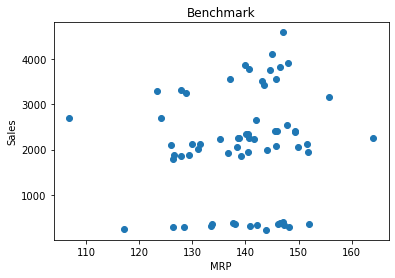

In [11]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(np.array(mrp), np.array(sales))
plt.title('Benchmark')
plt.xlabel('MRP')
plt.ylabel('Sales')

# Steps of Data Preprocessing 

* Data Cleansing --> (if there is a cleaning required)
* Missing Value imputation --> (if there is a missing value)
* Feature Engeering --> (if there is a requirement)
* EDA - Exploratory Data Analysis
* Outlier Handling --> (if there are any outliers)
* Categorical Encoding --> (if there are categorical values)
* Data Splits
* Feature Scaling

In [12]:
# next class - Data Cleansing

#### Data Cleansing

In [13]:
train['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [14]:
item_fat_content_dict = {'low fat':'Low Fat',
                        'LF':'Low Fat',
                        'Low Fat':'Low Fat',
                        'reg':'Regular',
                        'Regular':'Regular'}

In [15]:
train['Item_Fat_Content'] = train['Item_Fat_Content'].map(item_fat_content_dict)

In [16]:
train['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

#### Missing Value Imputation

In [17]:
train.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [18]:
train['Item_Weight']

0        9.300
1        5.920
2       17.500
3       19.200
4        8.930
         ...  
8518     6.865
8519     8.380
8520    10.600
8521     7.210
8522    14.800
Name: Item_Weight, Length: 8523, dtype: float64

#### Mean Imputation

In [19]:
print('Mean : ', train['Item_Weight'].mean())

Mean :  12.857645184136183


In [20]:
train['Item_Weight_Mean'] = train['Item_Weight'].fillna(train['Item_Weight'].mean())

In [21]:
train.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
Item_Weight_Mean                0
dtype: int64

In [22]:
train[['Item_Weight', 'Item_Weight_Mean']]

,Item_Weight,Item_Weight_Mean
0,9.300,9.300
1,5.920,5.920
2,17.500,17.500
3,19.200,19.200
4,8.930,8.930
...,...,...
8518,6.865,6.865
8519,8.380,8.380
8520,10.600,10.600
8521,7.210,7.210


#### Median Imputation

In [23]:
print('Median : ', train['Item_Weight'].median())

Median :  12.6


In [24]:
train['Item_Weight_Median'] = train['Item_Weight'].fillna(train['Item_Weight'].median())

In [25]:
train.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
Item_Weight_Mean                0
Item_Weight_Median              0
dtype: int64

#### Custom Statistical Imputation

In [26]:
weight_dict={}

for group,df in train.groupby(['Item_Type','Item_Fat_Content']):
    if df['Item_Weight'].isna().sum() != 0:
        print(f"Group: {group} \n\t- Null rows: {df['Item_Weight'].isna().sum()} \n\t- Total Rows : {df['Item_Weight'].shape[0]}")
        weight_dict[group] = df['Item_Weight'].mean()

Group: ('Baking Goods', 'Low Fat') 
	- Null rows: 67 
	- Total Rows : 329
Group: ('Baking Goods', 'Regular') 
	- Null rows: 45 
	- Total Rows : 319
Group: ('Breads', 'Low Fat') 
	- Null rows: 27 
	- Total Rows : 140
Group: ('Breads', 'Regular') 
	- Null rows: 20 
	- Total Rows : 111
Group: ('Breakfast', 'Low Fat') 
	- Null rows: 7 
	- Total Rows : 41
Group: ('Breakfast', 'Regular') 
	- Null rows: 14 
	- Total Rows : 69
Group: ('Canned', 'Low Fat') 
	- Null rows: 55 
	- Total Rows : 341
Group: ('Canned', 'Regular') 
	- Null rows: 55 
	- Total Rows : 308
Group: ('Dairy', 'Low Fat') 
	- Null rows: 64 
	- Total Rows : 418
Group: ('Dairy', 'Regular') 
	- Null rows: 52 
	- Total Rows : 264
Group: ('Frozen Foods', 'Low Fat') 
	- Null rows: 75 
	- Total Rows : 450
Group: ('Frozen Foods', 'Regular') 
	- Null rows: 63 
	- Total Rows : 406
Group: ('Fruits and Vegetables', 'Low Fat') 
	- Null rows: 112 
	- Total Rows : 630
Group: ('Fruits and Vegetables', 'Regular') 
	- Null rows: 101 
	- Total Ro

In [27]:
weight_dict

{('Baking Goods', 'Low Fat'): 12.552996183206107,
 ('Baking Goods', 'Regular'): 12.013302919708034,
 ('Breads', 'Low Fat'): 12.429911504424775,
 ('Breads', 'Regular'): 10.002142857142857,
 ('Breakfast', 'Low Fat'): 11.849411764705886,
 ('Breakfast', 'Regular'): 13.336181818181823,
 ('Canned', 'Low Fat'): 11.864650349650342,
 ('Canned', 'Regular'): 12.804288537549407,
 ('Dairy', 'Low Fat'): 13.391497175141243,
 ('Dairy', 'Regular'): 13.483797169811307,
 ('Frozen Foods', 'Low Fat'): 12.580333333333328,
 ('Frozen Foods', 'Regular'): 13.180539358600576,
 ('Fruits and Vegetables', 'Low Fat'): 12.757046332046352,
 ('Fruits and Vegetables', 'Regular'): 13.708363273453134,
 ('Hard Drinks', 'Low Fat'): 11.400327868852452,
 ('Health and Hygiene', 'Low Fat'): 13.142313953488392,
 ('Household', 'Low Fat'): 13.384736495388726,
 ('Meat', 'Low Fat'): 13.565643939393933,
 ('Meat', 'Regular'): 12.335512195121952,
 ('Others', 'Low Fat'): 13.853284671532842,
 ('Seafood', 'Low Fat'): 13.805344827586207,
 

In [28]:
train['Item_Weight_Grouped_Mean'] = train['Item_Weight']

In [29]:
for k,v in weight_dict.items():
    train.loc[(train['Item_Type']==k[0]) & 
              (train['Item_Fat_Content']==k[1]) & 
              (train['Item_Weight'].isna()), "Item_Weight_Grouped_Mean"] = v

In [30]:
train.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
Item_Weight_Mean                0
Item_Weight_Median              0
Item_Weight_Grouped_Mean        0
dtype: int64

In [31]:
weight_dict.items()

dict_items([(('Baking Goods', 'Low Fat'), 12.552996183206107), (('Baking Goods', 'Regular'), 12.013302919708034), (('Breads', 'Low Fat'), 12.429911504424775), (('Breads', 'Regular'), 10.002142857142857), (('Breakfast', 'Low Fat'), 11.849411764705886), (('Breakfast', 'Regular'), 13.336181818181823), (('Canned', 'Low Fat'), 11.864650349650342), (('Canned', 'Regular'), 12.804288537549407), (('Dairy', 'Low Fat'), 13.391497175141243), (('Dairy', 'Regular'), 13.483797169811307), (('Frozen Foods', 'Low Fat'), 12.580333333333328), (('Frozen Foods', 'Regular'), 13.180539358600576), (('Fruits and Vegetables', 'Low Fat'), 12.757046332046352), (('Fruits and Vegetables', 'Regular'), 13.708363273453134), (('Hard Drinks', 'Low Fat'), 11.400327868852452), (('Health and Hygiene', 'Low Fat'), 13.142313953488392), (('Household', 'Low Fat'), 13.384736495388726), (('Meat', 'Low Fat'), 13.565643939393933), (('Meat', 'Regular'), 12.335512195121952), (('Others', 'Low Fat'), 13.853284671532842), (('Seafood', '

#### Comparison of Imputation Methods

In [32]:
var_original = train['Item_Weight'].var()
var_mean = train['Item_Weight_Mean'].var()
var_median = train['Item_Weight_Median'].var()
var_grouped_mean = train['Item_Weight_Grouped_Mean'].var()

In [ ]:
import seaborn as sns

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax = sns.kdeplot(train['Item_Weight'].dropna(), shade = True, label = f"Original Variance: {var_original}")
ax = sns.kdeplot(train['Item_Weight_Mean'], shade = True, label = f"Mean Variance: {var_mean}")
ax = sns.kdeplot(train['Item_Weight_Median'], shade = True, label = f"Median Variance: {var_median}")
ax = sns.kdeplot(train['Item_Weight_Grouped_Mean'], shade = True, label = f"Grouped Mean Variance: {var_grouped_mean}")

In [34]:
train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_Mean,Item_Weight_Median,Item_Weight_Grouped_Mean
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,9.300,9.300,9.300
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,5.920,5.920,5.920
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,17.500,17.500,17.500
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,19.200,19.200,19.200
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,8.930,8.930,8.930
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834,6.865,6.865,6.865
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850,8.380,8.380,8.380
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136,10.600,10.600,10.600
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976,7.210,7.210,7.210


In [35]:
# Student Doubt

In [36]:
train['Item_Weight_Grouped_Mean_Modified'] = train['Item_Weight_Grouped_Mean']

In [37]:
train.loc[(train['Item_Weight_Grouped_Mean'] >= 9) & 
      (train['Item_Weight_Grouped_Mean'] <= 10), "Item_Weight_Grouped_Mean_Modified"] -=  5

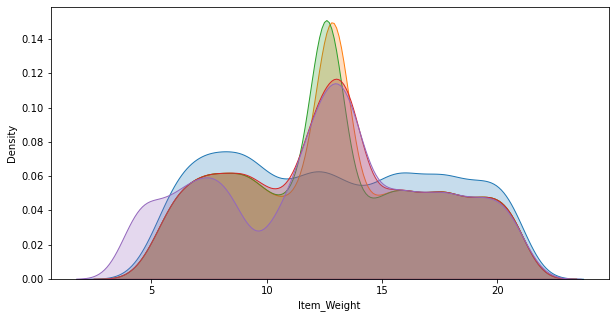

In [38]:
import seaborn as sns

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax = sns.kdeplot(train['Item_Weight'].dropna(), shade = True, label = f"Original Variance: {var_original}")
ax = sns.kdeplot(train['Item_Weight_Mean'], shade = True, label = f"Mean Variance: {var_mean}")
ax = sns.kdeplot(train['Item_Weight_Median'], shade = True, label = f"Median Variance: {var_median}")
ax = sns.kdeplot(train['Item_Weight_Grouped_Mean'], shade = True, label = f"Grouped Mean Variance: {var_grouped_mean}")
ax = sns.kdeplot(train['Item_Weight_Grouped_Mean_Modified'], shade = True)

In [39]:
# Student Doubt - END

#### Mode Imputation

In [40]:
train['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [41]:
train['Outlet_Size'].mode()

0    Medium
dtype: object

In [42]:
train['Outlet_Size'].mode()[0]

'Medium'

In [43]:
train['Outlet_Size_Mode'] = train['Outlet_Size'].fillna(train['Outlet_Size'].mode()[0])

In [44]:
train.isna().sum()

Item_Identifier                         0
Item_Weight                          1463
Item_Fat_Content                        0
Item_Visibility                         0
Item_Type                               0
Item_MRP                                0
Outlet_Identifier                       0
Outlet_Establishment_Year               0
Outlet_Size                          2410
Outlet_Location_Type                    0
Outlet_Type                             0
Item_Outlet_Sales                       0
Item_Weight_Mean                        0
Item_Weight_Median                      0
Item_Weight_Grouped_Mean                0
Item_Weight_Grouped_Mean_Modified       0
Outlet_Size_Mode                        0
dtype: int64

#### Custom Mode Impitation

In [45]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'Item_Weight_Mean',
       'Item_Weight_Median', 'Item_Weight_Grouped_Mean',
       'Item_Weight_Grouped_Mean_Modified', 'Outlet_Size_Mode'],
      dtype='object')

In [46]:
train['Outlet_Type']

0       Supermarket Type1
1       Supermarket Type2
2       Supermarket Type1
3           Grocery Store
4       Supermarket Type1
              ...        
8518    Supermarket Type1
8519    Supermarket Type1
8520    Supermarket Type1
8521    Supermarket Type2
8522    Supermarket Type1
Name: Outlet_Type, Length: 8523, dtype: object

In [47]:
train['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [48]:
 size_dict = {}

for group,df in train.groupby(['Outlet_Type']):
    if df['Outlet_Size'].isna().sum() != 0:
        print(f"Group : {group}\n\tNull Rows: {df['Outlet_Size'].isna().sum()}\n\tTotal Rows: {df['Outlet_Size'].shape[0]}")
        size_dict[group] = df['Outlet_Size'].mode().values[0]

Group : Grocery Store
	Null Rows: 555
	Total Rows: 1083
Group : Supermarket Type1
	Null Rows: 1855
	Total Rows: 5577


In [49]:
size_dict

{'Grocery Store': 'Small', 'Supermarket Type1': 'Small'}

In [50]:
train['Outlet_Size_Grouped_Mode'] = train['Outlet_Size']
for k,v in size_dict.items():
    train.loc[(train['Outlet_Type'] == k) &
             (train['Outlet_Size'].isna()), 'Outlet_Size_Grouped_Mode'] = v

In [51]:
train.isna().sum()

Item_Identifier                         0
Item_Weight                          1463
Item_Fat_Content                        0
Item_Visibility                         0
Item_Type                               0
Item_MRP                                0
Outlet_Identifier                       0
Outlet_Establishment_Year               0
Outlet_Size                          2410
Outlet_Location_Type                    0
Outlet_Type                             0
Item_Outlet_Sales                       0
Item_Weight_Mean                        0
Item_Weight_Median                      0
Item_Weight_Grouped_Mean                0
Item_Weight_Grouped_Mean_Modified       0
Outlet_Size_Mode                        0
Outlet_Size_Grouped_Mode                0
dtype: int64

# EDA - Exploratory Data Analysis

In [52]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'Item_Weight_Mean',
       'Item_Weight_Median', 'Item_Weight_Grouped_Mean',
       'Item_Weight_Grouped_Mean_Modified', 'Outlet_Size_Mode',
       'Outlet_Size_Grouped_Mode'],
      dtype='object')

In [53]:
num_cols = ['Item_Weight_Grouped_Mean', 'Item_Visibility', 'Item_MRP']
cat_cols = ['Item_Fat_Content', 'Item_Type', 'Outlet_Establishment_Year', 'Outlet_Size_Grouped_Mode', 'Outlet_Location_Type', 'Outlet_Type']
target = 'Item_Outlet_Sales'

In [54]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_Mean,Item_Weight_Median,Item_Weight_Grouped_Mean,Item_Weight_Grouped_Mean_Modified,Outlet_Size_Mode,Outlet_Size_Grouped_Mode
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,9.30,9.30,9.30,4.30,Medium,Medium
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,5.92,5.92,5.92,5.92,Medium,Medium
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,17.50,17.50,17.50,17.50,Medium,Medium
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,19.20,19.20,19.20,19.20,Medium,Small
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,8.93,8.93,8.93,8.93,High,High


#### Exploratory Analysis

#### Univariate Analysis

* Continuous Data -> num_cols -> pd.describe() -> distribution (distplot/kdeplot) skewness
* Categorical Data -> cat_cols -> value_counts() -> disribution (countplot/boxplot) outliers

#### Continuous

In [55]:
train[num_cols]

,Item_Weight_Grouped_Mean,Item_Visibility,Item_MRP
0,9.300,0.016047,249.8092
1,5.920,0.019278,48.2692
2,17.500,0.016760,141.6180
3,19.200,0.000000,182.0950
4,8.930,0.000000,53.8614
...,...,...,...
8518,6.865,0.056783,214.5218
8519,8.380,0.046982,108.1570
8520,10.600,0.035186,85.1224
8521,7.210,0.145221,103.1332


In [56]:
train[num_cols].describe()

,Item_Weight_Grouped_Mean,Item_Visibility,Item_MRP
count,8523.000000,8523.000000,8523.000000
mean,12.860708,0.066132,140.992782
std,4.237815,0.051598,62.275067
min,4.555000,0.000000,31.290000
25%,9.310000,0.026989,93.826500
50%,12.800000,0.053931,143.012800
75%,16.000000,0.094585,185.643700
max,21.350000,0.328391,266.888400


/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

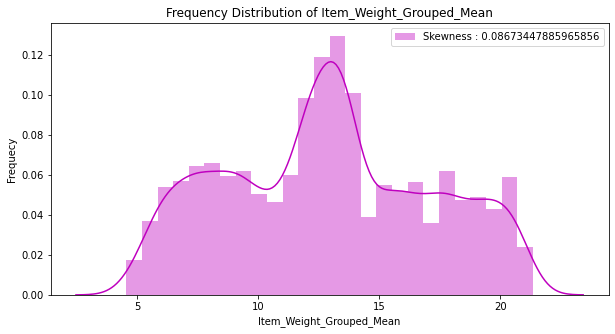

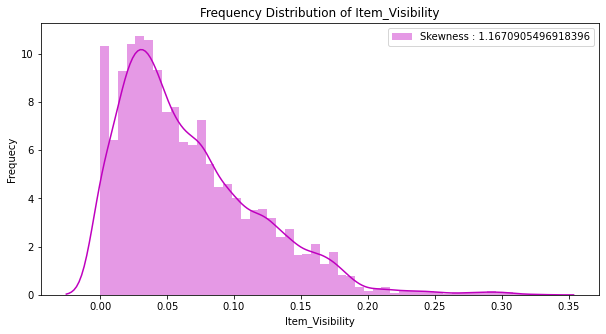

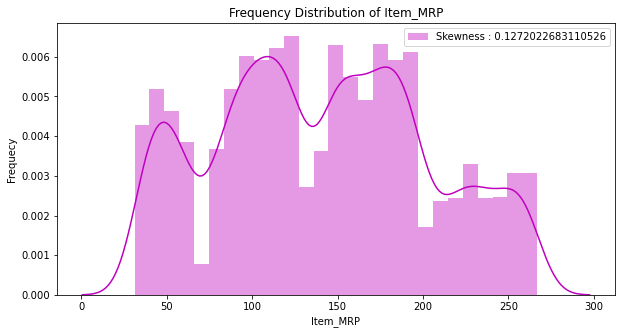

In [57]:
for col in num_cols:
    fig = plt.figure(figsize=(10,5))
    ax = fig.add_subplot(111)
    ax = sns.distplot(train[col], color='m', label=f'Skewness : {train[col].skew()}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequecy')
    ax.legend(loc='best')
    ax.set_title(f'Frequency Distribution of {col}')
    

#### Categorical

In [58]:
for col in cat_cols:
    print(f'\n{col}')
    print(train[col].value_counts())


Item_Fat_Content
Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

Outlet_Establishment_Year
1985    1463
1987     932
2004     930
1997     930
1999     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

Outlet_Size_Grouped_Mode
Small     4798
Medium    2793
High       932
Name: Outlet_Size_Grouped_Mode, dtype: int64

Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Locati

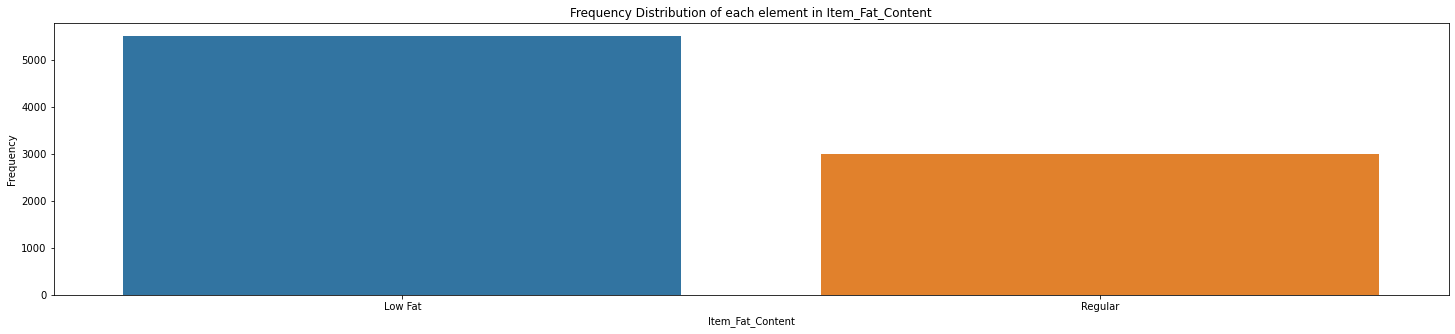

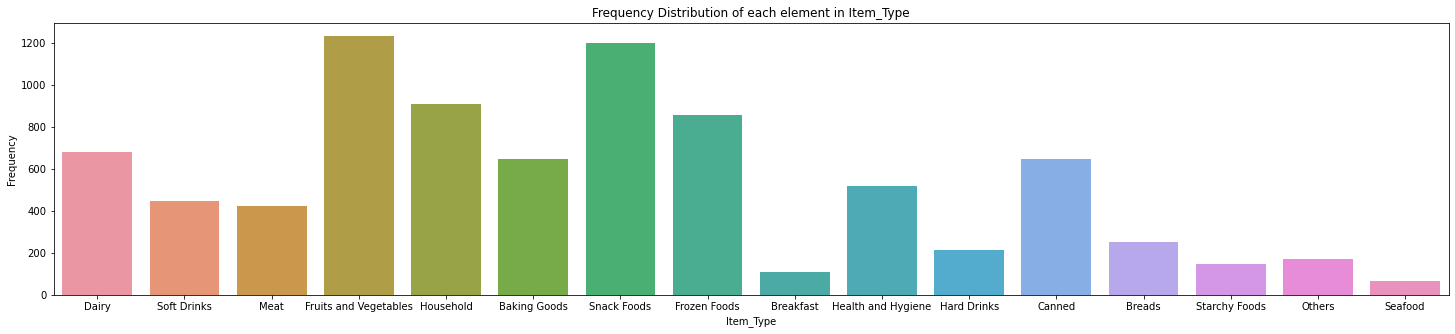

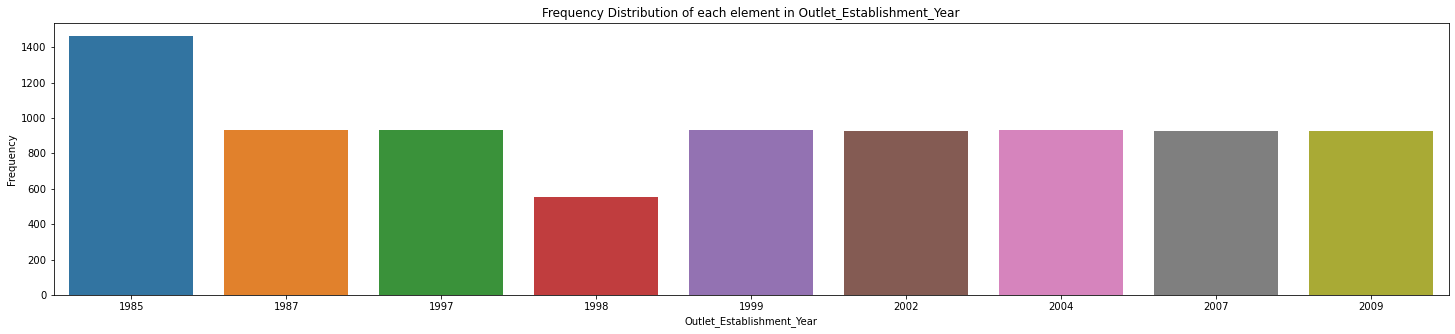

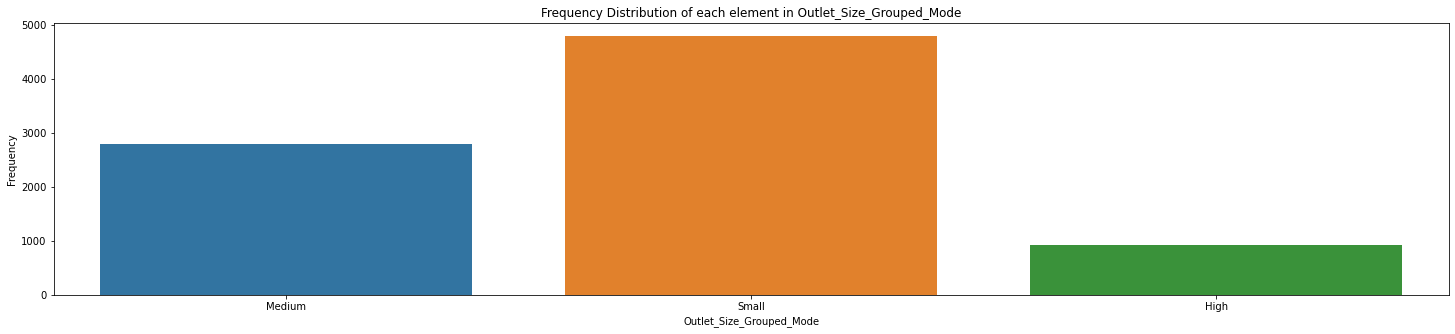

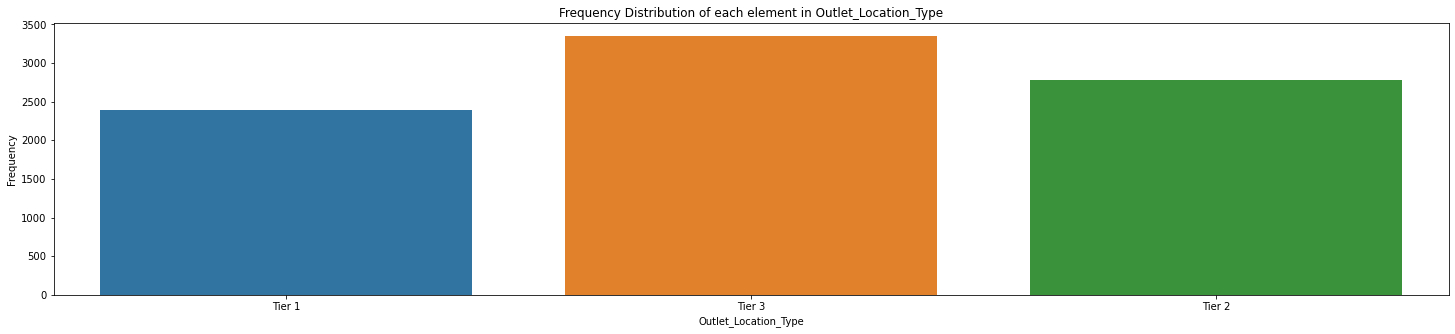

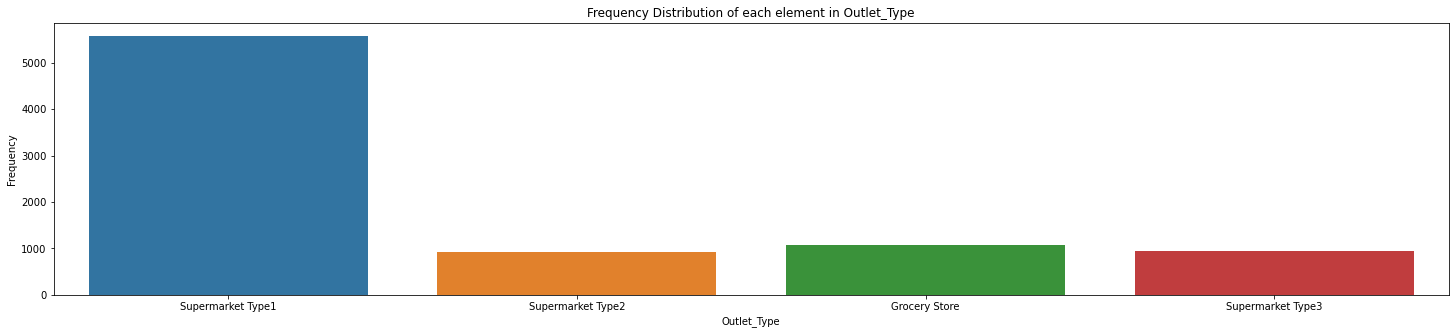

In [59]:
for col in cat_cols:
    fig = plt.figure(figsize=(25,5))
    ax = fig.add_subplot(111)
    sns.countplot(x = col,
                 data = train,
                 ax = ax)
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')
    ax.set_title(f'Frequency Distribution of each element in {col}')

#### Bivariate Analysis

* cont. vs cont. --> pairplot
* cont. vs cat.  --> boxplot
* cat. vs cat.   --> Heatmap

In [60]:
num_cols

['Item_Weight_Grouped_Mean', 'Item_Visibility', 'Item_MRP']

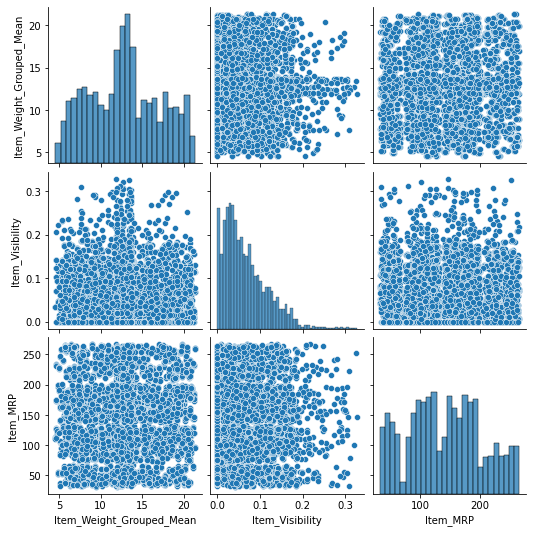

In [61]:
sns.pairplot(train[num_cols])

<AxesSubplot:xlabel='Outlet_Type', ylabel='Item_MRP'>

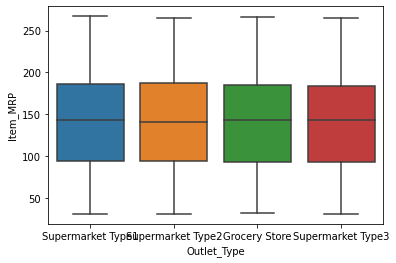

In [62]:
sns.boxplot(y = train['Item_MRP'], x = train['Outlet_Type'], data = train)

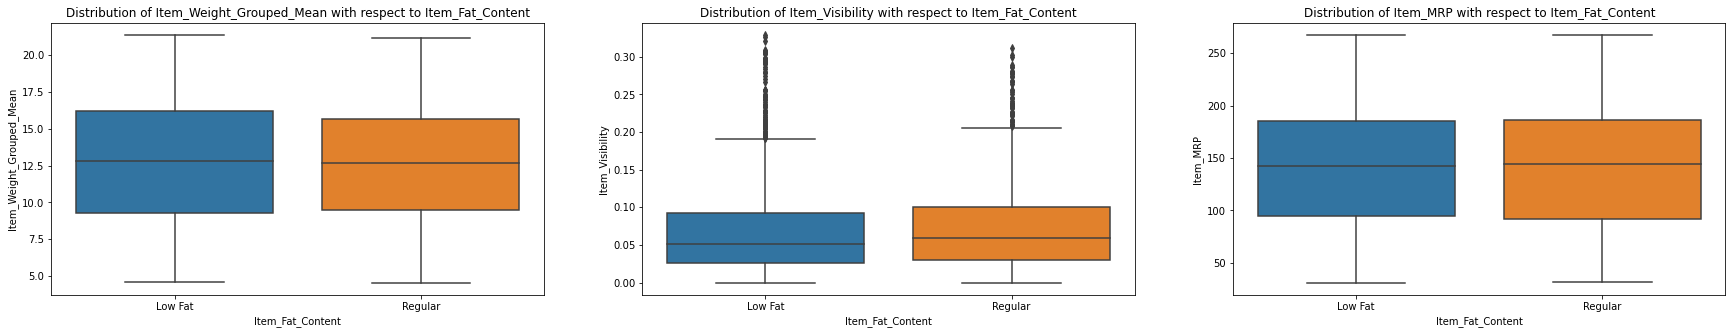

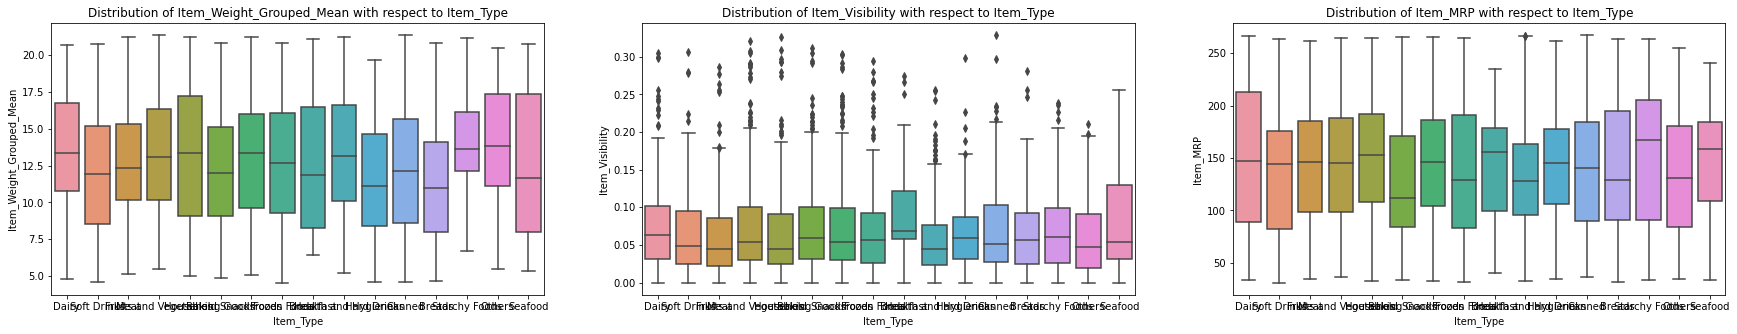

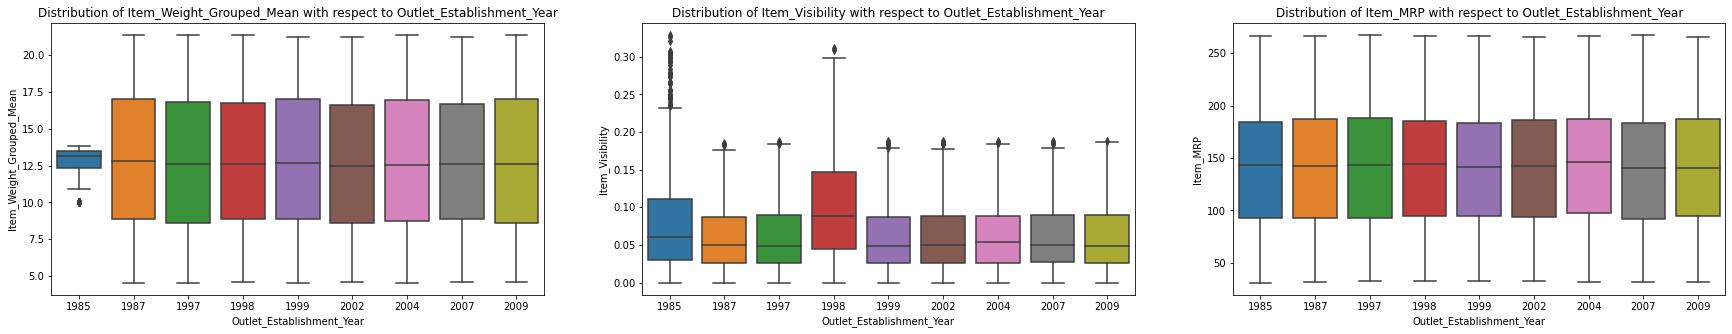

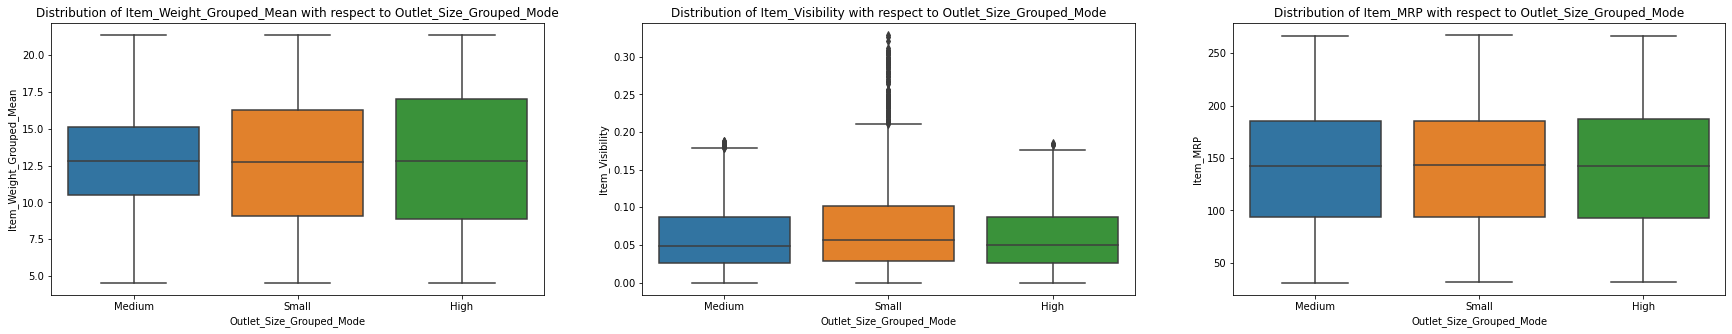

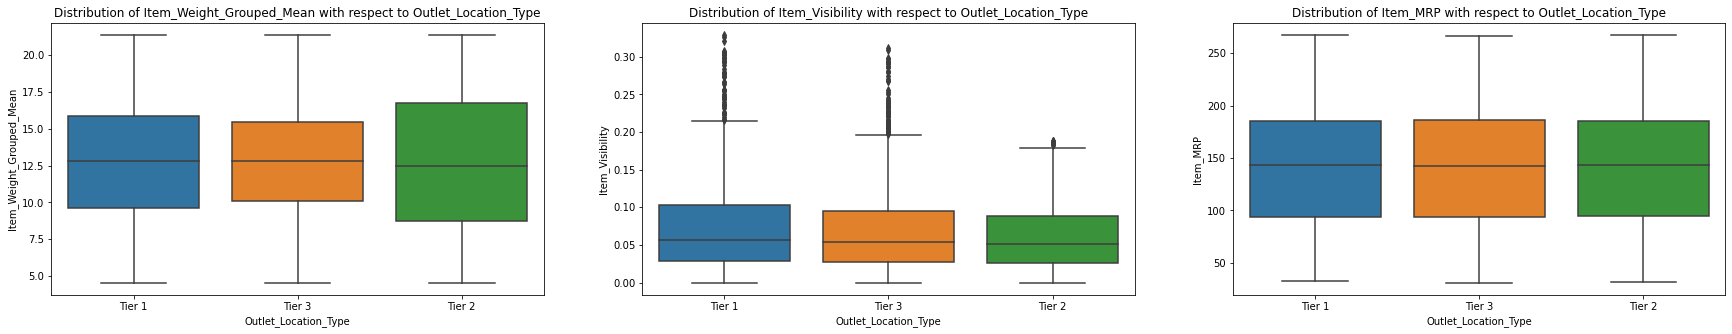

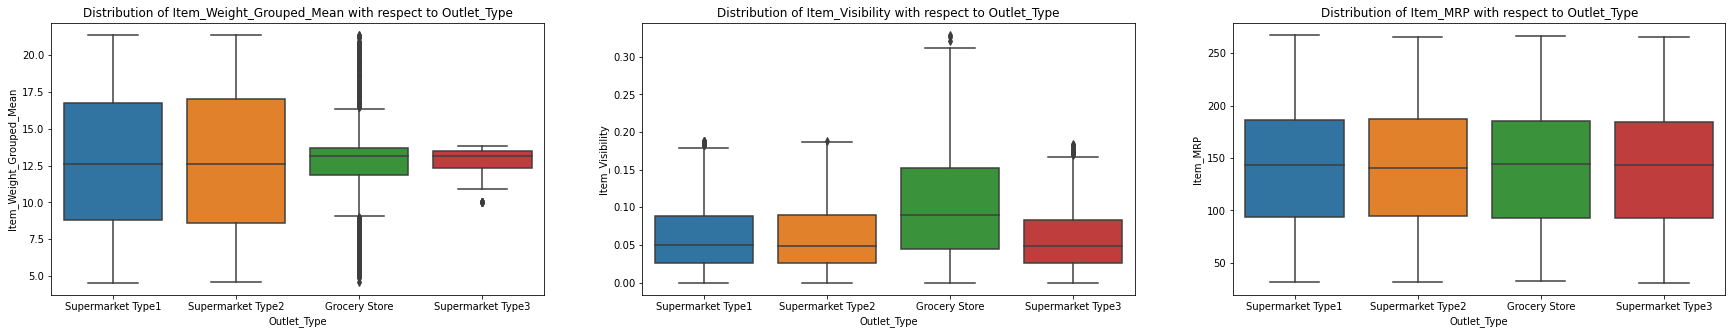

In [63]:
for col in cat_cols:
    fig = plt.figure(figsize=(30,5))
    i=1
    for n_col in num_cols:
        ax = fig.add_subplot(1,len(num_cols),i)
        sns.boxplot(y=n_col,
                   x=col,
                   data=train,
                   ax=ax)
        ax.set_xlabel(col)
        ax.set_ylabel(n_col)
        ax.set_title(f'Distribution of {n_col} with respect to {col}')
        i+=1

In [64]:
train.shape

(8523, 18)

In [65]:
pivot = pd.pivot_table(train, columns=cat_cols, aggfunc='count')

In [66]:
pivot

Item_Fat_Content                            Low Fat                \
Item_Type                              Baking Goods                 
Outlet_Establishment_Year                      1985                 
Outlet_Size_Grouped_Mode                     Medium         Small   
Outlet_Location_Type                         Tier 3        Tier 1   
Outlet_Type                       Supermarket Type3 Grocery Store   
Item_Identifier                                  39            28   
Item_MRP                                         39            28   
Item_Outlet_Sales                                39            28   
Item_Visibility                                  39            28   
Item_Weight                                       0             0   
Item_Weight_Grouped_Mean                         39            28   
Item_Weight_Grouped_Mean_Modified                39            28   
Item_Weight_Mean                                 39            28   
Item_Weight_Median                               39            28   
Outlet_Identifier                                39            28   
Outlet_Size                                      39            28   
Outlet_Size_Mode                                 39            28   

Item_Fat_Content                                                       \
Item_Type                                                               
Outlet_Establishment_Year                      1987              1997   
Outlet_Size_Grouped_Mode                       High             Small   
Outlet_Location_Type                         Tier 3            Tier 1   
Outlet_Type                       Supermarket Type1 Supermarket Type1   
Item_Identifier                                  35                38   
Item_MRP                                         35                38   
Item_Outlet_Sales                                35                38   
Item_Visibility                                  35                38   
Item_Weight                                      35                38   
Item_Weight_Grouped_Mean                         35                38   
Item_Weight_Grouped_Mean_Modified                35                38   
Item_Weight_Mean                                 35                38   
Item_Weight_Median                               35                38   
Outlet_Identifier                                35                38   
Outlet_Size                                      35                38   
Outlet_Size_Mode                                 35                38   

Item_Fat_Content                                                   \
Item_Type                                                           
Outlet_Establishment_Year                  1998              1999   
Outlet_Size_Grouped_Mode                  Small            Medium   
Outlet_Location_Type                     Tier 3            Tier 1   
Outlet_Type                       Grocery Store Supermarket Type1   
Item_Identifier                              20                29   
Item_MRP                                     20                29   
Item_Outlet_Sales                            20                29   
Item_Visibility                              20                29   
Item_Weight                                  20                29   
Item_Weight_Grouped_Mean                     20                29   
Item_Weight_Grouped_Mean_Modified            20                29   
Item_Weight_Mean                             20                29   
Item_Weight_Median                           20                29   
Outlet_Identifier                            20                29   
Outlet_Size                                   0                29   
Outlet_Size_Mode                             20                29   

Item_Fat_Content                                                       \
Item_Type                                                               
Outlet_Establishment_Year                      2002  

In [67]:
new_df = pd.DataFrame(pivot)

In [68]:
new_df

Item_Fat_Content                            Low Fat                \
Item_Type                              Baking Goods                 
Outlet_Establishment_Year                      1985                 
Outlet_Size_Grouped_Mode                     Medium         Small   
Outlet_Location_Type                         Tier 3        Tier 1   
Outlet_Type                       Supermarket Type3 Grocery Store   
Item_Identifier                                  39            28   
Item_MRP                                         39            28   
Item_Outlet_Sales                                39            28   
Item_Visibility                                  39            28   
Item_Weight                                       0             0   
Item_Weight_Grouped_Mean                         39            28   
Item_Weight_Grouped_Mean_Modified                39            28   
Item_Weight_Mean                                 39            28   
Item_Weight_Median                               39            28   
Outlet_Identifier                                39            28   
Outlet_Size                                      39            28   
Outlet_Size_Mode                                 39            28   

Item_Fat_Content                                                       \
Item_Type                                                               
Outlet_Establishment_Year                      1987              1997   
Outlet_Size_Grouped_Mode                       High             Small   
Outlet_Location_Type                         Tier 3            Tier 1   
Outlet_Type                       Supermarket Type1 Supermarket Type1   
Item_Identifier                                  35                38   
Item_MRP                                         35                38   
Item_Outlet_Sales                                35                38   
Item_Visibility                                  35                38   
Item_Weight                                      35                38   
Item_Weight_Grouped_Mean                         35                38   
Item_Weight_Grouped_Mean_Modified                35                38   
Item_Weight_Mean                                 35                38   
Item_Weight_Median                               35                38   
Outlet_Identifier                                35                38   
Outlet_Size                                      35                38   
Outlet_Size_Mode                                 35                38   

Item_Fat_Content                                                   \
Item_Type                                                           
Outlet_Establishment_Year                  1998              1999   
Outlet_Size_Grouped_Mode                  Small            Medium   
Outlet_Location_Type                     Tier 3            Tier 1   
Outlet_Type                       Grocery Store Supermarket Type1   
Item_Identifier                              20                29   
Item_MRP                                     20                29   
Item_Outlet_Sales                            20                29   
Item_Visibility                              20                29   
Item_Weight                                  20                29   
Item_Weight_Grouped_Mean                     20                29   
Item_Weight_Grouped_Mean_Modified            20                29   
Item_Weight_Mean                             20                29   
Item_Weight_Median                           20                29   
Outlet_Identifier                            20                29   
Outlet_Size                                   0                29   
Outlet_Size_Mode                             20                29   

Item_Fat_Content                                                       \
Item_Type                                                               
Outlet_Establishment_Year                      2002  

<AxesSubplot:xlabel='Item_Fat_Content-Item_Type-Outlet_Establishment_Year-Outlet_Size_Grouped_Mode-Outlet_Location_Type-Outlet_Type'>

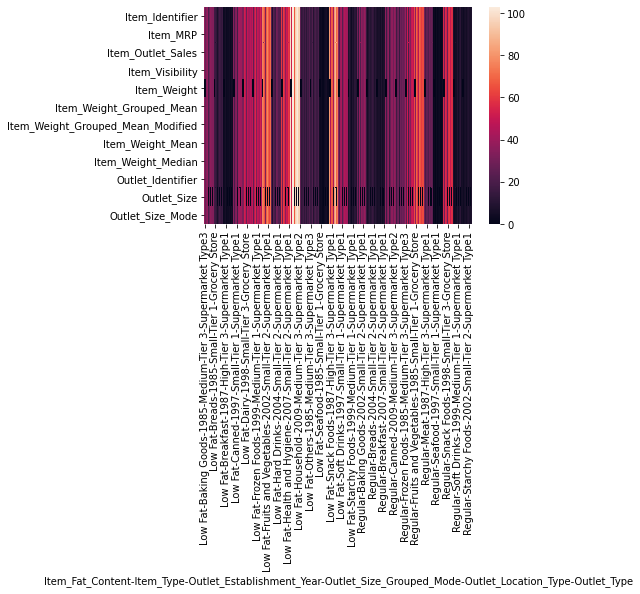

In [69]:
sns.heatmap(new_df)

In [70]:
# task - heatmap for cat vs cat (bi-variate analysis)

#### Multi-variate analysis

In [71]:
num_cols + [target]

['Item_Weight_Grouped_Mean',
 'Item_Visibility',
 'Item_MRP',
 'Item_Outlet_Sales']

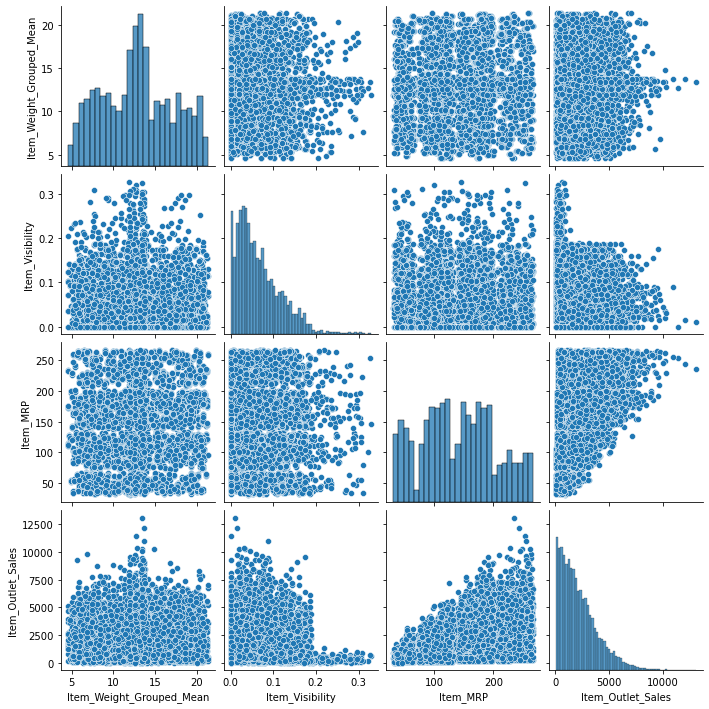

In [72]:
sns.pairplot(train[num_cols + [target]])

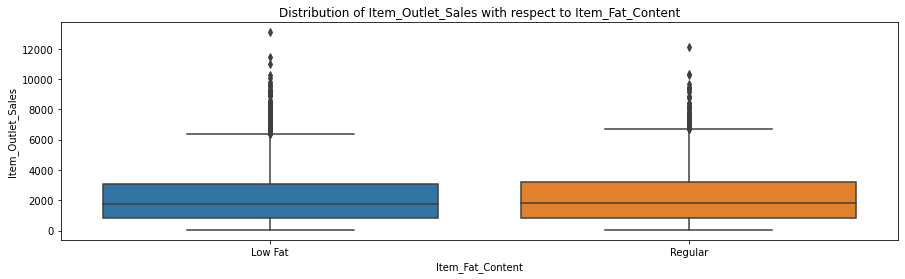

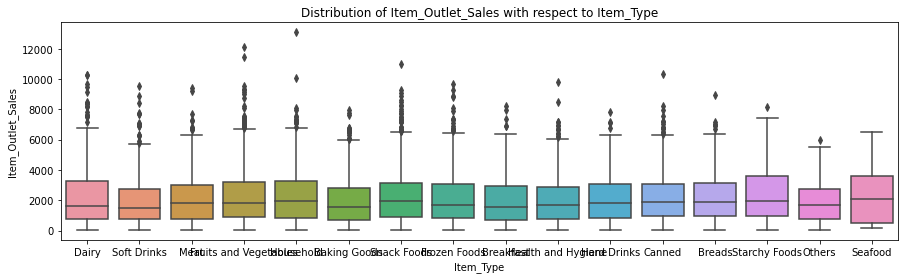

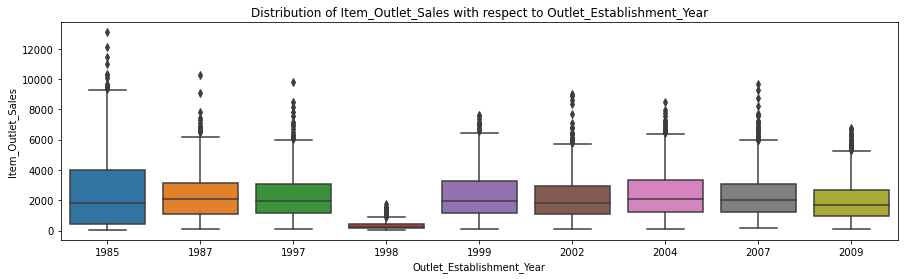

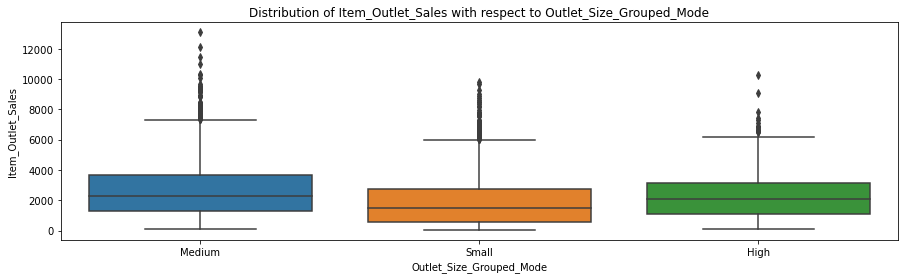

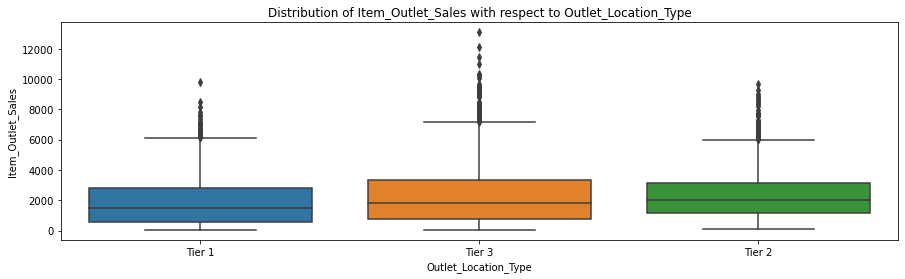

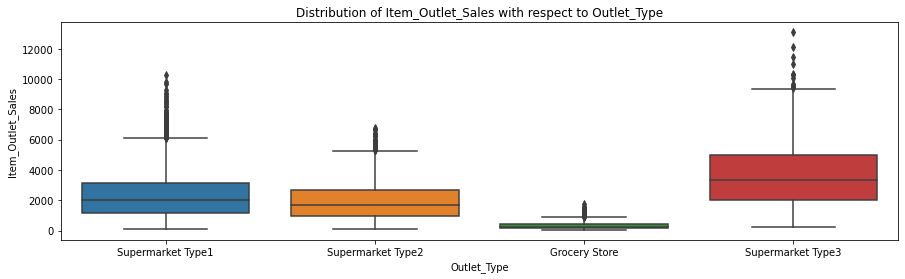

In [73]:
for col in cat_cols:
    fig=plt.figure(figsize=(15,4))
    ax=fig.add_subplot(111)
    sns.boxplot(y=target,
               x=col,
               data=train,
               ax=ax)
    ax.set_xlabel(col)
    ax.set_ylabel(target)
    ax.set_title(f'Distribution of {target} with respect to {col}')

# Outlier handling

In [74]:
def handle_outliers(df,var,tol):
    var_data=df[var].values
    q25 = np.percentile(var_data, 25)
    q75 = np.percentile(var_data, 75)
    
    print(f'Outlier Handling for {var}')
    print(f'Quartile 25: {q25}\nQuartile 75: {q75}')
    
    iqr = q75 - q25
    print(f'IQR : {iqr}')
    
    cut_off = iqr * tol
    lower = q25 - cut_off
    upper = q75 + cut_off
    
    print(f'Cut Off : {cut_off}')
    print(f'Upper Limit : {upper}')
    print(f'Lower Limit : {lower}')
    
    outliers = [x for x in var_data if x < lower or x > upper] 
    
    print(f'Number of Outliers in {var}: {len(outliers)}')
    print(f'{var} Outliers : {outliers}\n')
    
    return list(df[(df[var] > upper) | (df[var] < lower)].index)

In [75]:
train_copy = train.copy()

In [76]:
outliers=[]
for col in num_cols:
    print(col)
    outliers.extend(handle_outliers(train_copy, col, 1.5))
    
outliers = list(set(outliers))

train_copy = train_copy.drop(outliers)

Item_Weight_Grouped_Mean
Outlier Handling for Item_Weight_Grouped_Mean
Quartile 25: 9.31
Quartile 75: 16.0
IQR : 6.6899999999999995
Cut Off : 10.035
Upper Limit : 26.035
Lower Limit : -0.7249999999999996
Number of Outliers in Item_Weight_Grouped_Mean: 0
Item_Weight_Grouped_Mean Outliers : []

Item_Visibility
Outlier Handling for Item_Visibility
Quartile 25: 0.0269894775
Quartile 75: 0.0945852925
IQR : 0.067595815
Cut Off : 0.1013937225
Upper Limit : 0.195979015
Lower Limit : -0.07440424500000001
Number of Outliers in Item_Visibility: 144
Item_Visibility Outliers : [0.255394896, 0.293417759, 0.278974075, 0.291865402, 0.2047, 0.264124669, 0.228993134, 0.297883712, 0.233039817, 0.210375806, 0.220225608, 0.328390948, 0.205294827, 0.247321039, 0.214139786, 0.227189581, 0.223440258, 0.267352587, 0.25637539, 0.244102315, 0.255348289, 0.224837308, 0.22417463, 0.245542627, 0.236433601, 0.270300331, 0.204713036, 0.32111501, 0.248301532, 0.274405193, 0.207783483, 0.196438668, 0.235354055, 0.24105

In [77]:
train.shape

(8523, 18)

In [78]:
train_copy.shape

(8379, 18)

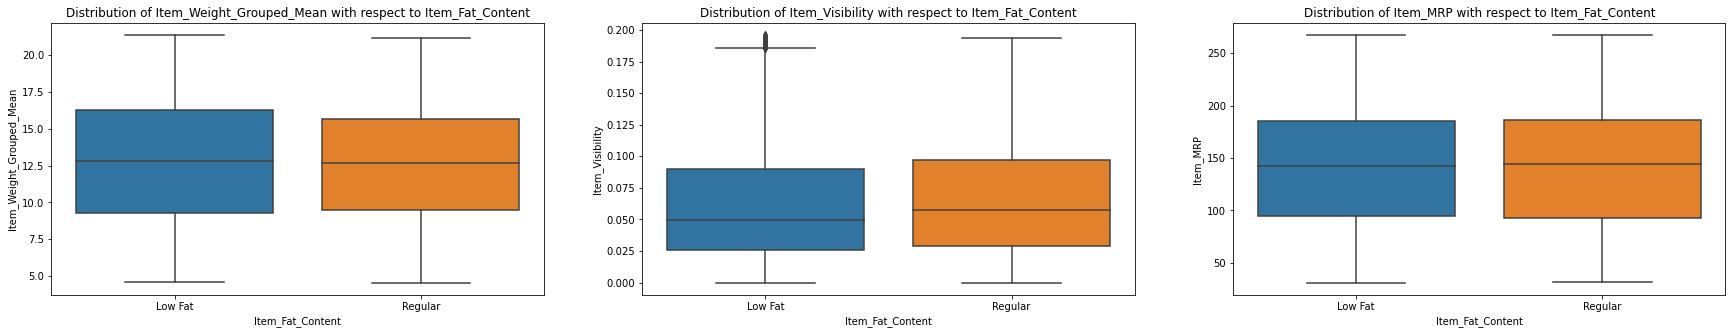

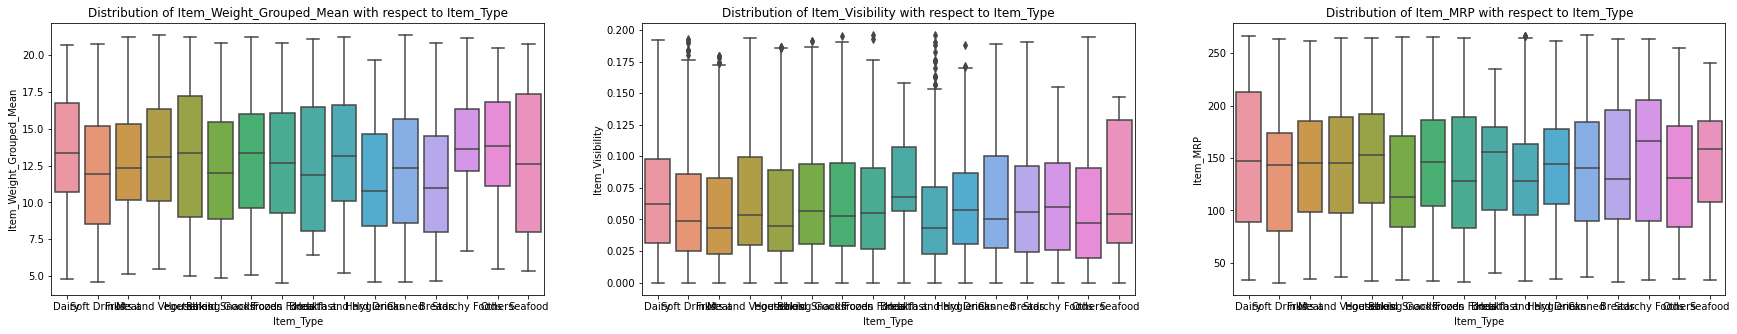

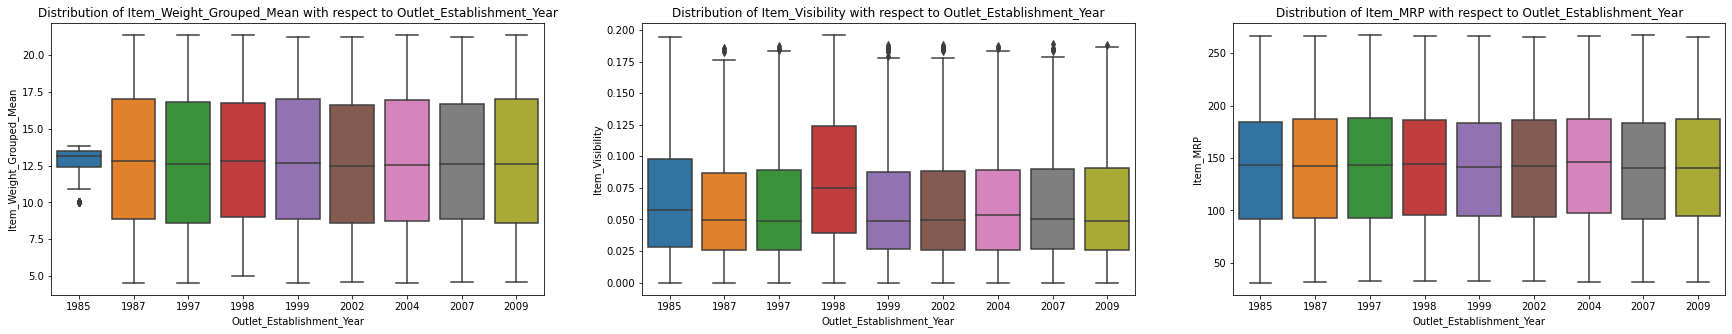

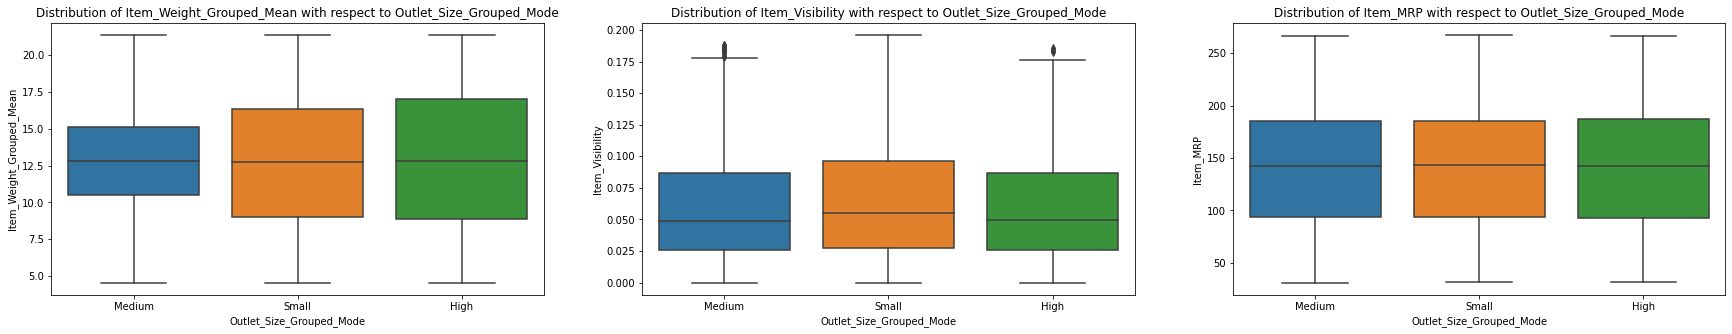

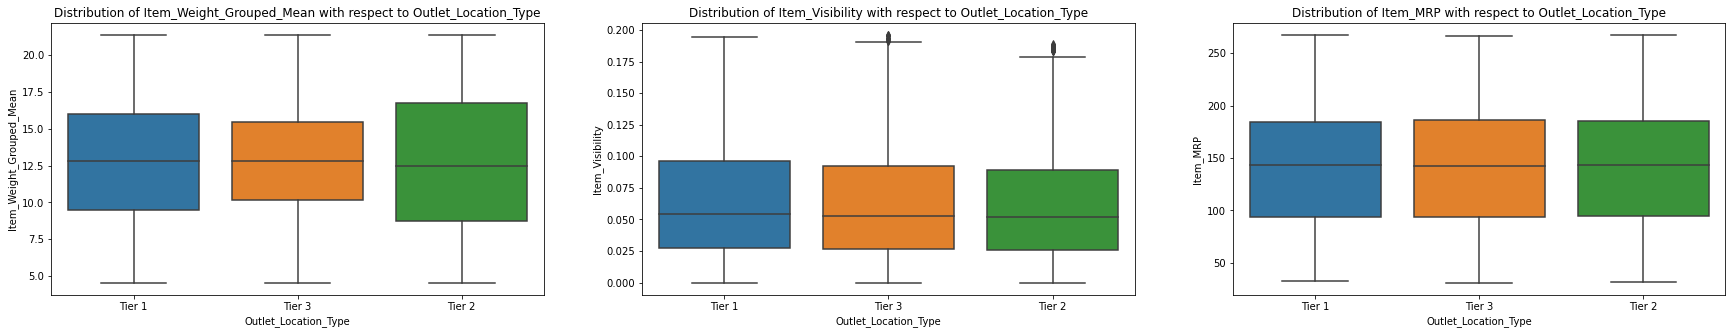

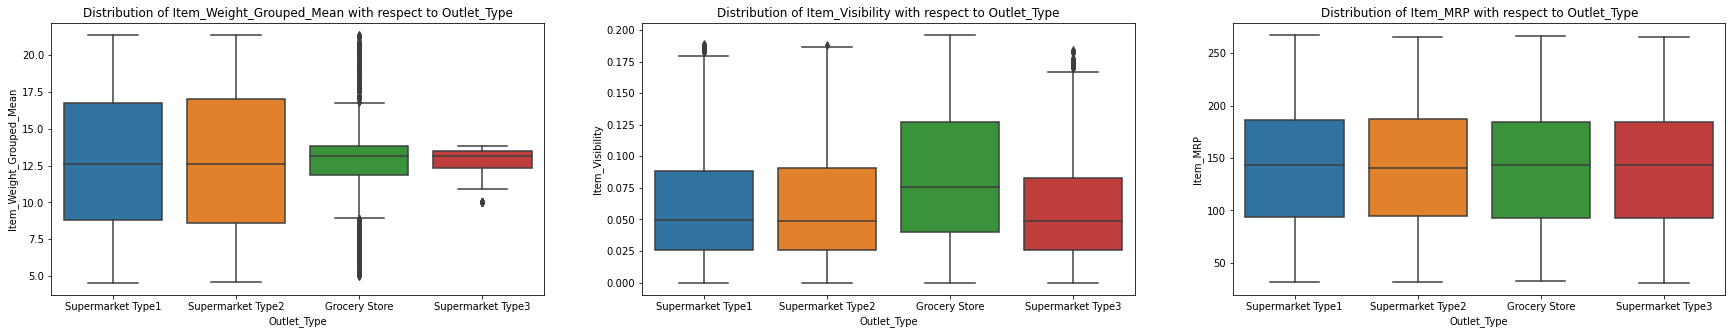

In [79]:
for col in cat_cols:
    fig = plt.figure(figsize=(30,5))
    i=1
    for n_col in num_cols:
        ax = fig.add_subplot(1,len(num_cols),i)
        sns.boxplot(y=n_col,
                   x=col,
                   data=train_copy,
                   ax=ax)
        ax.set_xlabel(col)
        ax.set_ylabel(n_col)
        ax.set_title(f'Distribution of {n_col} with respect to {col}')
        i+=1

#### Categorical Encoding

In [80]:
train_copy[num_cols + cat_cols].head()

,Item_Weight_Grouped_Mean,Item_Visibility,Item_MRP,Item_Fat_Content,Item_Type,Outlet_Establishment_Year,Outlet_Size_Grouped_Mode,Outlet_Location_Type,Outlet_Type
0,9.30,0.016047,249.8092,Low Fat,Dairy,1999,Medium,Tier 1,Supermarket Type1
1,5.92,0.019278,48.2692,Regular,Soft Drinks,2009,Medium,Tier 3,Supermarket Type2
2,17.50,0.016760,141.6180,Low Fat,Meat,1999,Medium,Tier 1,Supermarket Type1
3,19.20,0.000000,182.0950,Regular,Fruits and Vegetables,1998,Small,Tier 3,Grocery Store
4,8.93,0.000000,53.8614,Low Fat,Household,1987,High,Tier 3,Supermarket Type1


In [81]:
# One-Hot Encoding

train_copy['Item_Fat_Content']

0       Low Fat
1       Regular
2       Low Fat
3       Regular
4       Low Fat
         ...   
8518    Low Fat
8519    Regular
8520    Low Fat
8521    Regular
8522    Low Fat
Name: Item_Fat_Content, Length: 8379, dtype: object

In [82]:
pd.get_dummies(train_copy[num_cols + cat_cols], columns=cat_cols, drop_first=True)

,Item_Weight_Grouped_Mean,Item_Visibility,Item_MRP,Item_Fat_Content_Regular,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,...,Outlet_Establishment_Year_2004,Outlet_Establishment_Year_2007,Outlet_Establishment_Year_2009,Outlet_Size_Grouped_Mode_Medium,Outlet_Size_Grouped_Mode_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.300,0.016047,249.8092,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
1,5.920,0.019278,48.2692,1,0,0,0,0,0,0,...,0,0,1,1,0,0,1,0,1,0
2,17.500,0.016760,141.6180,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
3,19.200,0.000000,182.0950,1,0,0,0,0,0,1,...,0,0,0,0,1,0,1,0,0,0
4,8.930,0.000000,53.8614,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0.056783,214.5218,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
8519,8.380,0.046982,108.1570,1,0,0,0,0,0,0,...,0,0,0,0,1,1,0,1,0,0
8520,10.600,0.035186,85.1224,0,0,0,0,0,0,0,...,1,0,0,0,1,1,0,1,0,0
8521,7.210,0.145221,103.1332,1,0,0,0,0,0,0,...,0,0,1,1,0,0,1,0,1,0


In [83]:
cat_cols

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Establishment_Year',
 'Outlet_Size_Grouped_Mode',
 'Outlet_Location_Type',
 'Outlet_Type']

In [84]:
for col in cat_cols:
    print(train_copy[col].unique())

['Low Fat' 'Regular']
['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']
[1999 2009 1998 1987 1985 2002 2007 1997 2004]
['Medium' 'Small' 'High']
['Tier 1' 'Tier 3' 'Tier 2']
['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']


In [85]:
train_copy_dum = pd.get_dummies(train_copy[num_cols + cat_cols + [target]], columns=cat_cols, drop_first=True)

In [86]:
train_copy_dum.head()

,Item_Weight_Grouped_Mean,Item_Visibility,Item_MRP,Item_Outlet_Sales,Item_Fat_Content_Regular,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,...,Outlet_Establishment_Year_2004,Outlet_Establishment_Year_2007,Outlet_Establishment_Year_2009,Outlet_Size_Grouped_Mode_Medium,Outlet_Size_Grouped_Mode_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,3735.1380,0,0,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0
1,5.92,0.019278,48.2692,443.4228,1,0,0,0,0,0,...,0,0,1,1,0,0,1,0,1,0
2,17.50,0.016760,141.6180,2097.2700,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
3,19.20,0.000000,182.0950,732.3800,1,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
4,8.93,0.000000,53.8614,994.7052,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0


In [87]:
# train_copy_dum = pd.get_dummies(train_copy[num_cols + cat_cols + [target]], columns=cat_cols, drop_first=False)

In [88]:
# train_copy_dum.head()

#### Data Splits

In [89]:
from sklearn.model_selection import train_test_split

# train -> train_copy -> train_copy_dum

train_data_train, train_data_test = train_test_split(train_copy_dum, test_size=0.2, random_state=102)

In [90]:
train_data_train.head()

,Item_Weight_Grouped_Mean,Item_Visibility,Item_MRP,Item_Outlet_Sales,Item_Fat_Content_Regular,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,...,Outlet_Establishment_Year_2004,Outlet_Establishment_Year_2007,Outlet_Establishment_Year_2009,Outlet_Size_Grouped_Mode_Medium,Outlet_Size_Grouped_Mode_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
2845,11.800000,0.014116,178.5344,3390.2536,1,0,0,0,0,1,...,0,0,0,0,1,1,0,1,0,0
8356,13.707177,0.117531,222.7088,4026.7584,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1
7554,13.707177,0.079262,81.8250,83.2250,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2101,10.650000,0.048687,164.1526,1808.9786,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
3550,11.400328,0.016745,180.7660,3056.0220,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1


In [91]:
train_data_test.head()

,Item_Weight_Grouped_Mean,Item_Visibility,Item_MRP,Item_Outlet_Sales,Item_Fat_Content_Regular,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,...,Outlet_Establishment_Year_2004,Outlet_Establishment_Year_2007,Outlet_Establishment_Year_2009,Outlet_Size_Grouped_Mode_Medium,Outlet_Size_Grouped_Mode_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
7702,11.850000,0.055672,50.5666,922.7988,1,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
2469,11.350000,0.000000,103.0016,2125.2336,1,0,0,0,0,0,...,1,0,0,0,1,1,0,1,0,0
804,16.100000,0.024928,95.1410,3089.3120,1,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
214,14.650000,0.000000,161.5552,324.9104,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
2962,12.027116,0.117443,257.7304,774.9912,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [92]:
train_data_train.shape

(6703, 35)

In [93]:
train_data_test.shape

(1676, 35)

In [94]:
x_train = train_data_train.

SyntaxError: invalid syntax (<ipython-input-94-b21b25d9fb36>, line 1)